In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.utils.data as Data

E:\Anaconda3\envs\torch_gpu1.13\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
EPOCH=50#训练整批数据多少次
BATCH_SIZE=64#每次批数的数据量
LR=0.001#学习率，学习率的设置直接影响着神经网络的训练效果

In [4]:
train_data=torchvision.datasets.MNIST(#训练数据
     root= './mnist_data/',
     train=True,
     transform=torchvision.transforms.ToTensor(),
     download=True
     )
test_data = torchvision.datasets.MNIST(
     root='./mnist_data/', 
     train=False,
     transform=torchvision.transforms.ToTensor(),
     download=True
     )

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:02<00:00, 3440961.05it/s]


Extracting ./mnist_data/MNIST\raw\train-images-idx3-ubyte.gz to ./mnist_data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 124843.80it/s]


Extracting ./mnist_data/MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist_data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 915929.25it/s]


Extracting ./mnist_data/MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST\raw



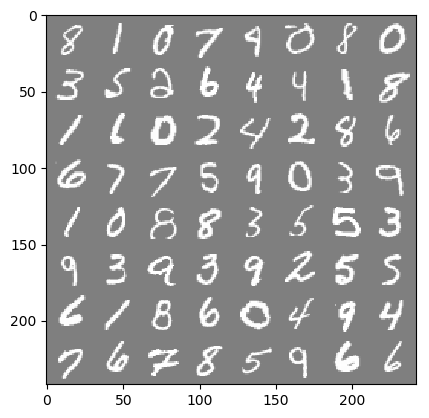

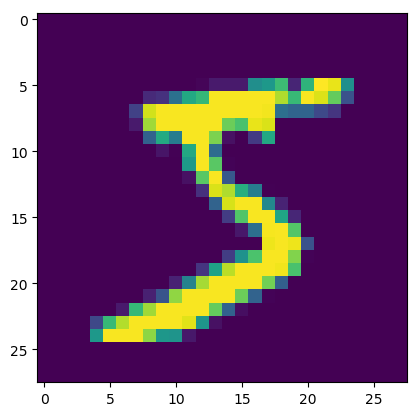

In [5]:
# 批量加载
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = Data.DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

# 数据可视化
images, label = next(iter(train_loader))
images_example = torchvision.utils.make_grid(images)
images_example = images_example.numpy().transpose(1,2,0) # 将图像的通道值置换到最后的维度，符合图像的格式
mean = [0.5,0.5,0.5]
std = [0.5,0.5,0.5]
images_example = images_example * std + mean
plt.imshow(images_example )
plt.show()

image_array,_=train_data[0]#把一个批数的训练数据的第一个取出
image_array=image_array.reshape(28,28) #转换成28*28的矩阵
plt.imshow(image_array)
plt.show()

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(  # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,      # input height输入
                out_channels=16,    # n_filters输出
                kernel_size=5,      # filter size滤波核大小
                stride=1,           # filter movement/step步长
                padding=2,      # 如果想要 con2d 出来的图片长宽没有变化, padding=，(kernel_size-1)/2 当 stride=1填充
            ),      # output shape (16, 28, 28)
            nn.ReLU(),    # activation
            nn.MaxPool2d(kernel_size=2),    # 在 2x2 空间里向下采样, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(  # input shape (16, 28, 28)
            nn.Conv2d(16, 32, 5, 1, 2),  # output shape (32, 14, 14)
            nn.ReLU(),  # activation
            nn.MaxPool2d(2),  # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)   # 展平多维的卷积图成 (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output

In [23]:
import torch.nn as nn  
  
class CNN(nn.Module):  
    def __init__(self):  
        super(CNN, self).__init__()  
        self.conv = nn.Sequential(  # input shape should be (batch_size, 1, 28, 28)  
            nn.Conv2d(  
                in_channels=1,      # input channels  
                out_channels=16,    # output channels  
                kernel_size=5,      # kernel size  
                stride=1,           # stride  
                padding=2,          # padding to keep dimensions  
            ),      # output shape (batch_size, 16, 28, 28)  
            nn.ReLU(),    # activation function  
            nn.MaxPool2d(kernel_size=2, stride=2),  # output shape (batch_size, 16, 14, 14)  
        )  
        self.out = nn.Linear(16 * 14 * 14, 10)  # fully connected layer, output 10 classes  
  
    def forward(self, x):  
        x = self.conv(x)  
        x = x.view(x.size(0), -1)  # flatten the tensor to (batch_size, 16 * 14 * 14)  
        output = self.out(x)  
        return output

In [24]:
cnn = CNN().cuda()
print(cnn)  # 显示神经网络

CNN(
  (conv): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=3136, out_features=10, bias=True)
)


Epoch 0: Train Loss = 0.2427, Test Accuracy = 0.9719, Test Loss = 0.0917
Epoch 1: Train Loss = 0.0824, Test Accuracy = 0.9795, Test Loss = 0.0658
Epoch 2: Train Loss = 0.0621, Test Accuracy = 0.9791, Test Loss = 0.0604
Epoch 3: Train Loss = 0.0527, Test Accuracy = 0.9832, Test Loss = 0.0495
Epoch 4: Train Loss = 0.0444, Test Accuracy = 0.9840, Test Loss = 0.0475
Epoch 5: Train Loss = 0.0397, Test Accuracy = 0.9835, Test Loss = 0.0492
Epoch 6: Train Loss = 0.0348, Test Accuracy = 0.9840, Test Loss = 0.0486
Epoch 7: Train Loss = 0.0311, Test Accuracy = 0.9851, Test Loss = 0.0465
Epoch 8: Train Loss = 0.0285, Test Accuracy = 0.9855, Test Loss = 0.0422
Epoch 9: Train Loss = 0.0245, Test Accuracy = 0.9850, Test Loss = 0.0466
Epoch 10: Train Loss = 0.0224, Test Accuracy = 0.9854, Test Loss = 0.0462
Epoch 11: Train Loss = 0.0199, Test Accuracy = 0.9880, Test Loss = 0.0419
Epoch 12: Train Loss = 0.0174, Test Accuracy = 0.9865, Test Loss = 0.0469
Epoch 13: Train Loss = 0.0167, Test Accuracy = 0

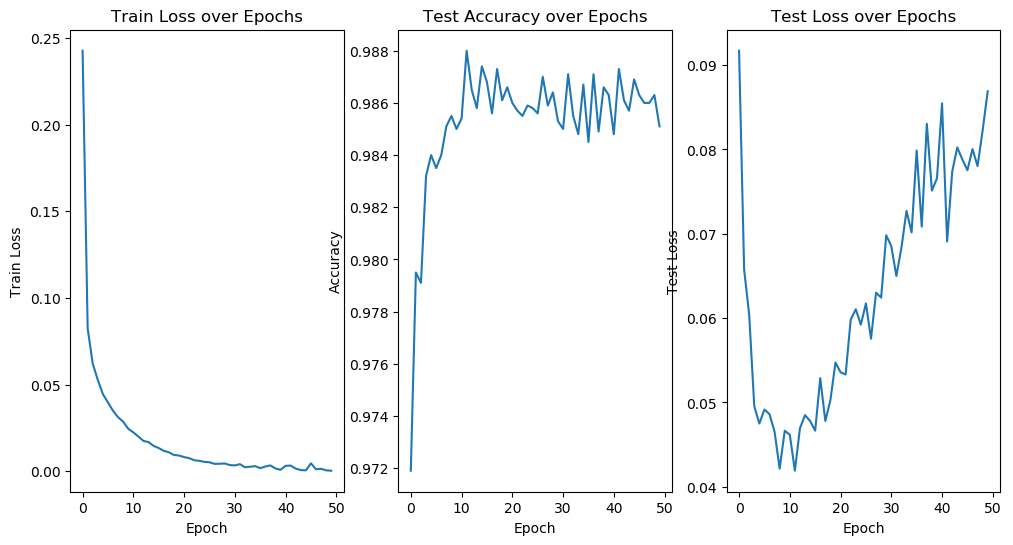

In [26]:
import matplotlib.pyplot as plt  
  
# 初始化列表来保存每个epoch的loss和accuracy  
train_losses = []
test_losses = []
test_accuracies = []  
  
# Adam优化函数和损失函数定义（这部分代码保持不变）  
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)  
loss_func = nn.CrossEntropyLoss()  
  
# 训练过程（这部分代码基本保持不变，但增加了loss的记录）  
for epoch in range(EPOCH):  
    train_loss = 0.0
    test_loss = 0.0
    for step, (x, y) in enumerate(train_loader):  
        b_x = x.cuda()  
        b_y = y.cuda()  
        output = cnn(b_x)  
        loss = loss_func(output, b_y)  
        optimizer.zero_grad()  
        loss.backward()  
        optimizer.step()  
          
        # 累加每个batch的loss  
        train_loss += loss.item()  
          
    # 计算平均loss并保存到列表中  
    train_losses.append(train_loss / len(train_loader))  
      
    # 在测试集上测试，并计算准确率（这部分代码基本保持不变，但增加了accuracy的记录）  
    test_accuracy = 0.0  
    total_test_samples = 0  
    with torch.no_grad():  
        for step, (x, y) in enumerate(test_loader):  
            test_x, test_y = x.cuda(), y.cuda()  
            test_output = cnn(test_x)
            loss = loss_func(test_output, test_y) 
            pred_y = torch.max(test_output, 1)[1]  
            test_accuracy += (pred_y == test_y).float().sum().item()  
            total_test_samples += len(test_y)  
            
            test_loss += loss.item()
        test_losses.append(test_loss / len(test_loader))  

    # 计算平均accuracy并保存到列表中  
    test_accuracies.append(test_accuracy / total_test_samples)  
      
    # 打印每个epoch的loss和accuracy（可选）  
    print(f'Epoch {epoch}: Train Loss = {train_losses[-1]:.4f}, Test Accuracy = {test_accuracies[-1]:.4f}, Test Loss = {test_losses[-1]:.4f}')  
  
# 可视化训练过程的loss和测试过程的accuracy  
plt.figure(figsize=(12, 6))  
plt.subplot(1, 3, 1)  
plt.plot(train_losses)  
plt.title('Train Loss over Epochs')  
plt.xlabel('Epoch')  
plt.ylabel('Train Loss')  
  
plt.subplot(1, 3, 2)  
plt.plot(test_accuracies)  
plt.title('Test Accuracy over Epochs')  
plt.xlabel('Epoch')  
plt.ylabel('Accuracy')  

plt.subplot(1, 3, 3)  
plt.plot(test_losses)  
plt.title('Test Loss over Epochs')  
plt.xlabel('Epoch')  
plt.ylabel('Test Loss')  
plt.show()
plt.show()

In [27]:
torch.save(cnn,'MNIST.pt')